### convert series to list format

In [ ]:
text = df['twitter'].tolist()

### tasks 

In [3]:
'''tasks.
***General Feature Extraction
***File loading
***Word counts
***Characters count
***Average characters per word
***Stop words count
***Count #HashTags and @Mentions
***If numeric digits are present in twitts
***Upper case word counts
***Preprocessing and Cleaning
***Lower case
***Contraction to Expansion
***Emails removal and counts
***URLs removal and counts
***Removal of RT
***Removal of Special Characters
***Removal of multiple spaces
***Removal of HTML tags
***Removal of accented characters
***Removal of Stop Words
***Conversion into base form of words
***Common Occuring words Removal
***Rare Occuring words Removal
***Word Cloud
***Spelling Correction
***Tokenization
***Lemmatization
***Detecting Entities using NER
***Noun Detection
***Language Detection
***Sentence Translation
***Using Inbuilt Sentiment Classifier
***Advanced Text Processing and Feature Extraction
***N-Gram, Bi-Gram etc
***Bag of Words (BoW)
***Term Frequency Calculation TF
***Inverse Document Frequency IDF
***TFIDF Term Frequency – Inverse Document Frequency
***Word Embedding Word2Vec using SpaCy
***Machine Learning Models for Text Classification
***SGDClassifier
***LogisticRegression
***LogisticRegressionCV
***LinearSVC
***RandomForestClassifier'''

'tasks.\n***General Feature Extraction\n***File loading\n***Word counts\n***Characters count\n***Average characters per word\n***Stop words count\n***Count #HashTags and @Mentions\n***If numeric digits are present in twitts\n***Upper case word counts\n***Preprocessing and Cleaning\n***Lower case\n***Contraction to Expansion\n***Emails removal and counts\n***URLs removal and counts\n***Removal of RT\n***Removal of Special Characters\n***Removal of multiple spaces\n***Removal of HTML tags\n***Removal of accented characters\n***Removal of Stop Words\n***Conversion into base form of words\n***Common Occuring words Removal\n***Rare Occuring words Removal\n***Word Cloud\n***Spelling Correction\n***Tokenization\n***Lemmatization\n***Detecting Entities using NER\n***Noun Detection\n***Language Detection\n***Sentence Translation\n***Using Inbuilt Sentiment Classifier\n***Advanced Text Processing and Feature Extraction\n***N-Gram, Bi-Gram etc\n***Bag of Words (BoW)\n***Term Frequency Calculation

In [4]:
'''# importing required libs
! pip install -U spacy
! pip install -U spacy-lookups-data
! python -m spacy download en_core_web_sm
! python -m spacy download en_core_web_md
! python -m spacy download en_core_web_lg'''

'# importing required libs\n! pip install -U spacy\n! pip install -U spacy-lookups-data\n! python -m spacy download en_core_web_sm\n! python -m spacy download en_core_web_md\n! python -m spacy download en_core_web_lg'

In [5]:
import numpy as np
import pandas as pd
from spacy.lang.en.stop_words import STOP_WORDS

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('tweets.csv',encoding='latin1',header=None)
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
data.shape

(1600000, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
data= data[[5, 0]]
data.columns = ['tweets', 'sentiment']
data.head()

,tweets,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [10]:
data['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [11]:
sent_map = {0:'negetive',4:'positive'}

### word_count

In [12]:
data['word_count'] = data['tweets'].apply(lambda x: len(str(x).split()))
data.head()

,tweets,sentiment,word_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


### character_count

In [13]:
data['char_count'] = data['tweets'].apply(lambda x: len(x))
data.head()

,tweets,sentiment,word_count,char_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


### Average_word_length_in_a_sentence

In [14]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words) # != len(x)/len(words)

In [15]:
data['avg_word_count'] = data['tweets'].apply(lambda x: get_avg_word_len(x))

In [16]:
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


### stop_words

In [1]:
from spacy.lang.en.stop_words import STOP_WORDS
len(STOP_WORDS)

326

In [18]:
data['stop_words_len'] = data['tweets'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [19]:
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


### count of #tags, @mentions

In [20]:
#ex:
x = 'this is #hashtag and @mention'
#x=x.split()
#print(x)
[t for t in x.split() if t.startswith('#')]

['#hashtag']

In [21]:
data['count_@mentions'] = data['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))
data['count_#tags'] = data['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len,count_@mentions,count_#tags
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,1,0


### Numerics_finding

In [22]:
data['numeric_count'] = data['tweets'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len,count_@mentions,count_#tags,numeric_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,1,0,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,1,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,1,0,0


### find uppercase count3

In [23]:
data['uppercase_count'] = data['tweets'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))
data.head().T

,0,1,2,3,4
tweets,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",is upset that he can't update his Facebook by ...,@Kenichan I dived many times for the ball. Man...,my whole body feels itchy and like its on fire,"@nationwideclass no, it's not behaving at all...."
sentiment,0,0,0,0,0
word_count,19,21,18,10,21
char_count,115,111,89,47,111
avg_word_count,5.05263,4.28571,3.94444,3.7,4.28571
stop_words_len,4,9,7,5,10
count_@mentions,1,0,1,0,1
count_#tags,0,0,0,0,0
numeric_count,0,0,0,0,0
uppercase_count,1,0,1,0,1


In [24]:
data.loc[96]['tweets']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

# text preprocessing and cleaning

### lowercase_conversion

In [25]:
data['tweets'] = data['tweets'].apply(lambda x: x.lower())
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len,count_@mentions,count_#tags,numeric_count,uppercase_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,1,0,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,1,0,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,1,0,0,1


In [26]:
data.loc[96]['tweets']

"so rylee,grace...wana go steve's party or not?? sadly since its easter i wnt b able 2 do much  but ohh well....."

### contraction to expansion

In [27]:
#ex: don't = do not, con't = can not, he'll = he will

In [28]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [29]:
def contraction_to_expansion(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x

In [30]:
%%time
data['tweets'] = data['tweets'].apply(lambda x:contraction_to_expansion(x))
data.head().T

Wall time: 40.4 s


,0,1,2,3,4
tweets,"@switchfoot http://twitpic.com/2y1zl - awww, t...",is upset that he cannot update his facebook by...,@kenichan i dived many times for the ball. man...,my whole body feels itchy and like its on fire,"@nationwideclass no, it is not behaving at all..."
sentiment,0,0,0,0,0
word_count,19,21,18,10,21
char_count,115,111,89,47,111
avg_word_count,5.05263,4.28571,3.94444,3.7,4.28571
stop_words_len,4,9,7,5,10
count_@mentions,1,0,1,0,1
count_#tags,0,0,0,0,0
numeric_count,0,0,0,0,0
uppercase_count,1,0,1,0,1


### count and remove emails

In [31]:
import re
data['email'] = data['tweets'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',x))
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len,count_@mentions,count_#tags,numeric_count,uppercase_count,email
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,1,0,0,1,[]
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[]
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,1,0,0,1,[]
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[]
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,1,0,0,1,[]


In [32]:
data['email_count'] = data['email'].apply(lambda x: len(x))
data[data['email_count']>1].T


,532187,592361,1108850,1244943
tweets,@lorrainestanick hey! i wanted the cherish lip...,misses @jcphenom.. @kindoann.. @golfplay16..@l...,"@hitekfame i am not on the computer, but if y...","@tcthurhappyhour yes yes yes, sign me up! inf..."
sentiment,0,0,4,4
word_count,17,4,16,15
char_count,138,102,119,133
avg_word_count,7.11765,24.5,6.4375,7.8
stop_words_len,6,0,9,2
count_@mentions,1,3,1,1
count_#tags,0,0,0,0
numeric_count,0,0,0,0
uppercase_count,0,0,0,2


In [33]:

data['tweets'] = data['tweets'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)','',x))
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len,count_@mentions,count_#tags,numeric_count,uppercase_count,email,email_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,1,0,0,1,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,1,0,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,1,0,0,1,[],0


### url remove

In [34]:
data['urls_flag'] = data['tweets'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len,count_@mentions,count_#tags,numeric_count,uppercase_count,email,email_count,urls_flag
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,1,0,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,1,0,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,1,0,0,1,[],0,0


In [35]:
data['tweets'] = data['tweets'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '',x))
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len,count_@mentions,count_#tags,numeric_count,uppercase_count,email,email_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,1,0,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,1,0,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,1,0,0,1,[],0,0


### remove retweets(RT)

In [36]:
data['tweets'] = data['tweets'].apply(lambda x: re.sub('RT', "", x))
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len,count_@mentions,count_#tags,numeric_count,uppercase_count,email,email_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,1,0,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,1,0,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,1,0,0,1,[],0,0


### special chars or puncuation removal

In [37]:
data['tweets'] = data['tweets'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '',x))
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len,count_@mentions,count_#tags,numeric_count,uppercase_count,email,email_count,urls_flag
0,switchfoot - awww that is a bummer you shoul...,0,19,115,5.052632,4,1,0,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,1,0,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,1,0,0,1,[],0,0


In [38]:
data.loc[71]['tweets']

'ninjen i am sure youre right    i need to start working out with you and the nikster or jared at least'

### remove multiple spaces

In [39]:
data['tweets'] = data['tweets'].apply(lambda x: ' '.join(x.split()))
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len,count_@mentions,count_#tags,numeric_count,uppercase_count,email,email_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,5.052632,4,1,0,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,1,0,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,1,0,0,1,[],0,0


### remove html tags

In [40]:
from bs4 import BeautifulSoup

In [41]:
%%time
data['tweets'] = data['tweets'].apply(lambda x: BeautifulSoup(x,'lxml').get_text())
data.head()

Wall time: 7min 28s


,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len,count_@mentions,count_#tags,numeric_count,uppercase_count,email,email_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,5.052632,4,1,0,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,1,0,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,1,0,0,1,[],0,0


### remove acented chars

In [42]:
#ex: x = 'Áccěntěd těxt'

In [43]:
import unicodedata

In [44]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [45]:
data['tweets'] = data['tweets'].apply(lambda x: remove_accented_chars(x))
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len,count_@mentions,count_#tags,numeric_count,uppercase_count,email,email_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,5.052632,4,1,0,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,1,0,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,1,0,0,1,[],0,0


# spacy and nltk

### remove stop words

In [46]:
import spacy
data['tweets'] = data['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in STOP_WORDS]))
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len,count_@mentions,count_#tags,numeric_count,uppercase_count,email,email_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,1,0,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,1,0,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,1,0,0,1,[],0,0


### convert into base/root word form

In [47]:
nlp = spacy.load('en_core_web_sm')

In [48]:
#ex: x = 'kenichan dived times ball managed save 50 rest'
# dived = dive, times = time, managed = manage

In [49]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))

In [50]:
'''
#it is depends on the task.
data['tweets'] = data['tweets'].apply(lambda x: make_to_base(x))
data.head()'''

"\n#it is depends on the task.\ndata['tweets'] = data['tweets'].apply(lambda x: make_to_base(x))\ndata.head()"

### remove common(frequently occured) words

In [51]:
data.head()['tweets']
' '.join(data.head()['tweets'])

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad'

In [52]:
df = data.copy()

In [53]:
combined_text = ' '.join(df['tweets'])

In [55]:
frq_common = pd.Series(combined_text).value_counts()

In [56]:
f20 = frq_common[:20]

In [57]:
#it is depends on the task.
data['tweets'] = data['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))
data.head()


,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len,count_@mentions,count_#tags,numeric_count,uppercase_count,email,email_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,1,0,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,1,0,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,1,0,0,1,[],0,0


### reare word remooval

In [58]:
rare= frq_common[frq_common.values==1]

In [59]:
data['tweets'] = data['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare]))
data.head()

,tweets,sentiment,word_count,char_count,avg_word_count,stop_words_len,count_@mentions,count_#tags,numeric_count,uppercase_count,email,email_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,1,0,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,1,0,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,1,0,0,1,[],0,0


### word cloud visualization 

In [60]:
! pip install wordcloud

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
x =''.join(combined_text[:20000])
x

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad kwesidei crew need hug loltrish hey long time yes rains bit bit lol fine thanks tatianak nope twittera que muera spring break plain city snowing re-pierced ears caregiving bear watch thought ua loss embarrassing octolinz16 counts idk talk anymore smarrison wouldve gun zac snyders doucheclown iamjazzyfizzle wish got watch miss iamlilnicki premiere hollis death scene hurt severely watch film wry directors cut file taxes lettya ahh ive wanted rent love soundtrack fakerpattypattz oh dear drinking forgotten table drinks alydesigns day friend called asked meet mid valley todaybut time sigh angrybarista baked cake ated week going hoped blagh class 8 tomorrow hate wake people going cry sleep watching marley im sad misslilly ooooh lol leslie ok wont leslie wont mad meh lover

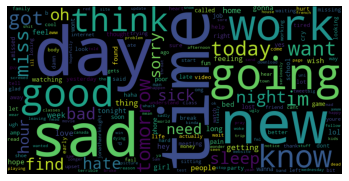

In [76]:
word_cloud = WordCloud(width = 800,height = 400).generate(x)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### spelling correction

In [77]:
!pip install -U textblob
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\mayyi\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mayyi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mayyi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mayyi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\mayyi\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\mayyi\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [82]:
from textblob import TextBlob
x=combined_text[:1000]#here combined text is a text corpus
TextBlob(x).correct()

TextBlob("switchfoot - www summer should got david care day d upset update facebook testing cry result school today bah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad kwesidei crew need hug loltrish hey long time yes rains bit bit ll fine thanks tatianak hope twitter que mere spring break plain city showing re-pierced ears caregiving bear watch thought a loss embarrassing octolinz16 counts ink talk anymore harrison would gun sac spiders doucheclown iamjazzyfizzle wish got watch miss iamlilnicki premiers holmes death scene hurt severely watch film wry directors cut file taxes letter ah give wanted rent love soundtrack fakerpattypattz oh dear drinking forgotten table drinks alydesigns day friend called asked meet mid valley todaybut time sigh angrybarista baked cake acted week going hoped black class 8 tomorrow hate wake people going cry sleep watching barley in sad misslilly oooh ll leslie ok wont leslie wont mad me lover ")

In [83]:
x

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad kwesidei crew need hug loltrish hey long time yes rains bit bit lol fine thanks tatianak nope twittera que muera spring break plain city snowing re-pierced ears caregiving bear watch thought ua loss embarrassing octolinz16 counts idk talk anymore smarrison wouldve gun zac snyders doucheclown iamjazzyfizzle wish got watch miss iamlilnicki premiere hollis death scene hurt severely watch film wry directors cut file taxes lettya ahh ive wanted rent love soundtrack fakerpattypattz oh dear drinking forgotten table drinks alydesigns day friend called asked meet mid valley todaybut time sigh angrybarista baked cake ated week going hoped blagh class 8 tomorrow hate wake people going cry sleep watching marley im sad misslilly ooooh lol leslie ok wont leslie wont mad meh lover

### tokenization

In [84]:
from textblob import TextBlob
TextBlob(x).words

WordList(['switchfoot', 'awww', 'bummer', 'shoulda', 'got', 'david', 'carr', 'day', 'd', 'upset', 'update', 'facebook', 'texting', 'cry', 'result', 'school', 'today', 'blah', 'kenichan', 'dived', 'times', 'ball', 'managed', 'save', '50', 'rest', 'bounds', 'body', 'feels', 'itchy', 'like', 'fire', 'nationwideclass', 'behaving', 'mad', 'kwesidei', 'crew', 'need', 'hug', 'loltrish', 'hey', 'long', 'time', 'yes', 'rains', 'bit', 'bit', 'lol', 'fine', 'thanks', 'tatianak', 'nope', 'twittera', 'que', 'muera', 'spring', 'break', 'plain', 'city', 'snowing', 're-pierced', 'ears', 'caregiving', 'bear', 'watch', 'thought', 'ua', 'loss', 'embarrassing', 'octolinz16', 'counts', 'idk', 'talk', 'anymore', 'smarrison', 'wouldve', 'gun', 'zac', 'snyders', 'doucheclown', 'iamjazzyfizzle', 'wish', 'got', 'watch', 'miss', 'iamlilnicki', 'premiere', 'hollis', 'death', 'scene', 'hurt', 'severely', 'watch', 'film', 'wry', 'directors', 'cut', 'file', 'taxes', 'lettya', 'ahh', 'ive', 'wanted', 'rent', 'love', 

In [ ]:
'''or'''

In [85]:
doc = nlp(x)
for word in doc:
    print(word)
    

switchfoot
-
awww
bummer
shoulda
got
david
carr
day
d
upset
update
facebook
texting
cry
result
school
today
blah
kenichan
dived
times
ball
managed
save
50
rest
bounds
body
feels
itchy
like
fire
nationwideclass
behaving
mad
kwesidei
crew
need
hug
loltrish
hey
long
time
yes
rains
bit
bit
lol
fine
thanks
tatianak
nope
twittera
que
muera
spring
break
plain
city
snowing
re
-
pierced
ears
caregiving
bear
watch
thought
ua
loss
embarrassing
octolinz16
counts
idk
talk
anymore
smarrison
would
ve
gun
zac
snyders
doucheclown
iamjazzyfizzle
wish
got
watch
miss
iamlilnicki
premiere
hollis
death
scene
hurt
severely
watch
film
wry
directors
cut
file
taxes
lettya
ahh
i
ve
wanted
rent
love
soundtrack
fakerpattypattz
oh
dear
drinking
forgotten
table
drinks
alydesigns
day
friend
called
asked
meet
mid
valley
todaybut
time
sigh
angrybarista
baked
cake
ated
week
going
hoped
blagh
class
8
tomorrow
hate
wake
people
going
cry
sleep
watching
marley
i
m
sad
misslilly
ooooh
lol
leslie
ok
wo
nt
leslie
wo
nt
mad
meh

### lemmatization

In [86]:
'''with textblob'''
from textblob import Word

for token in x.split():
    print(Word(token).lemmatize())

switchfoot
-
awww
bummer
shoulda
got
david
carr
day
d
upset
update
facebook
texting
cry
result
school
today
blah
kenichan
dived
time
ball
managed
save
50
rest
bound
body
feel
itchy
like
fire
nationwideclass
behaving
mad
kwesidei
crew
need
hug
loltrish
hey
long
time
yes
rain
bit
bit
lol
fine
thanks
tatianak
nope
twittera
que
muera
spring
break
plain
city
snowing
re-pierced
ear
caregiving
bear
watch
thought
ua
loss
embarrassing
octolinz16
count
idk
talk
anymore
smarrison
wouldve
gun
zac
snyders
doucheclown
iamjazzyfizzle
wish
got
watch
miss
iamlilnicki
premiere
hollis
death
scene
hurt
severely
watch
film
wry
director
cut
file
tax
lettya
ahh
ive
wanted
rent
love
soundtrack
fakerpattypattz
oh
dear
drinking
forgotten
table
drink
alydesigns
day
friend
called
asked
meet
mid
valley
todaybut
time
sigh
angrybarista
baked
cake
ated
week
going
hoped
blagh
class
8
tomorrow
hate
wake
people
going
cry
sleep
watching
marley
im
sad
misslilly
ooooh
lol
leslie
ok
wont
leslie
wont
mad
meh
lover


In [ ]:
'''or'''

In [91]:
import spacy
doc = nlp(x)
for token in doc:
    print(token.lemm_)

AttributeError: 'spacy.tokens.token.Token' object has no attribute 'lemm_'

### named entity finding

In [93]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' --- ' + ent.label_ + ' --- ' + str(spacy.explain(ent.label_)))

switchfoot --- PERSON --- People, including fictional
bummer shoulda --- FAC --- Buildings, airports, highways, bridges, etc.
david carr --- PERSON --- People, including fictional
blah kenichan --- PERSON --- People, including fictional
50 --- CARDINAL --- Numerals that do not fall under another type
mad kwesidei --- PERSON --- People, including fictional
que muera --- PERSON --- People, including fictional
spring --- DATE --- Absolute or relative dates or periods
idk --- ORG --- Companies, agencies, institutions, etc.
smarrison --- ORG --- Companies, agencies, institutions, etc.
zac --- PERSON --- People, including fictional
alydesigns day --- DATE --- Absolute or relative dates or periods
mid valley --- DATE --- Absolute or relative dates or periods
angrybarista baked cake --- PERSON --- People, including fictional
week --- DATE --- Absolute or relative dates or periods
8 --- CARDINAL --- Numerals that do not fall under another type
lol leslie --- PERSON --- People, including fiction

In [ ]:
'''or'''

In [95]:
from spacy import displacy
displacy.render(doc,style='ent')

### detecting nouns

In [96]:
for noun in doc.noun_chunks:
    print(noun)

switchfoot - awww bummer shoulda
david carr day d upset update facebook
cry result school
blah kenichan
times
50 rest bounds body
fire nationwideclass
mad kwesidei crew
hug
rains bit bit lol
tatianak nope twittera que muera spring
plain city snowing re-pierced ears
bear watch
ua
loss
embarrassing octolinz16
idk talk
smarrison
gun zac snyders
iamjazzyfizzle wish
watch miss iamlilnicki premiere hollis death scene
film
wry directors
file taxes
lettya ahh
i
rent love soundtrack
oh dear drinking forgotten table drinks alydesigns day friend
sigh angrybarista
cake
people
cry sleep
marley
i
sad misslilly ooooh lol leslie
meh lover


### translation and language detection

In [100]:
#to detect language type we use text blob
tb = TextBlob(x)
tb.detect_language()

#to transltae language
tb.translate(to='te')#Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php(ISO 639-1 Code)

TextBlob("స్విచ్ఫుట్ - అవ్ బమ్మర్ తప్పా డేవిడ్ కార్ డే డి అప్‌సెట్ అప్‌డేట్ ఫేస్‌బుక్ టెక్స్టింగ్ క్రై రిజల్ట్ స్కూల్ ఈ రోజు బ్లా కెనిచన్ డైవ్డ్ టైమ్స్ బాల్ మేనేజ్డ్ సేవ్ 50 రెస్ట్ బౌండ్స్ బాడీ ఫైర్ లాగా దురద అనిపిస్తుంది. ధన్యవాదాలు టాటియానక్ నోప్ ట్విట్టెరా క్యూ ముయెరా స్ప్రింగ్ బ్రేక్ ప్లెయిన్ సిటీ స్నోయింగ్ రీ-కుట్టిన చెవులు సంరక్షణ బేర్ వాచ్ ఆలోచన ఫైల్ టాక్స్ లెట్టియా అహ్ ఐవ్ వాంటెడ్ అద్దె ప్రేమ సౌండ్‌ట్రాక్ ఫేకర్‌పట్టిపాట్జ్ ఓ ప్రియమైన మద్యపానం మర్చిపోయిన టేబుల్ డ్రింక్స్ అలైడిజైన్స్ డే ఫ్రెండ్ అడిగాడు మీట్ మిడ్ వ్యాలీని కలుసుకున్నారు lol leslie ok wont leslie wont పిచ్చి మెహ్ ప్రేమికుడు")

In [101]:
tb.translate(to='hi')

TextBlob("switchfoot - awww bummer shoulda को david carr day d upset update facebook texting cry result school आज blah kenichan dived टाइम्स बॉल को बचाने में 50 रेस्ट बाउंड्स बॉडी में खुजली महसूस होती है जैसे कि अग्नि राष्ट्रविद्या की तरह बर्ताव करता है पागल kwesidei क्रू की जरूरत हग loltrish अरे जरूरत लंबे समय तक बारिश बिट्स बिट lol धन्यवाद tatianak nope twittera क्वी मुरा स्प्रिंग ब्रेक प्लेन सिटी स्नोइंग री-पियर्स कान केयरिंग डाइविंग वॉच थिंक ua लॉस शर्मनाक ऑक्टोलिनज़ 16 काउंट्स आइडेक टॉक अब स्मियरिसन गन जेएसी स्नेकर्स डौचेक्लोउन इम्माज़ज़ीफिजल काश, वॉच मिस आईमैलिग्निरी प्रीमियर प्रीमियर हिसोरोलिया प्रीमियर शो होगा। फ़ाइल कर देना लोल लेस्ली ओके वोंट लेडली वोंट मैड लवर्स")

### use inbuilt sentiment classifier

In [105]:
from textblob.sentiments import NaiveBayesAnalyzer
tb = TextBlob(x,analyzer=NaiveBayesAnalyzer())
tb.sentiment

Sentiment(classification='neg', p_pos=6.942883340264831e-05, p_neg=0.9999305711665882)

# Advance text processing

### n-grams

In [130]:
x = combined_text[:1000]
type(x)
x

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad kwesidei crew need hug loltrish hey long time yes rains bit bit lol fine thanks tatianak nope twittera que muera spring break plain city snowing re-pierced ears caregiving bear watch thought ua loss embarrassing octolinz16 counts idk talk anymore smarrison wouldve gun zac snyders doucheclown iamjazzyfizzle wish got watch miss iamlilnicki premiere hollis death scene hurt severely watch film wry directors cut file taxes lettya ahh ive wanted rent love soundtrack fakerpattypattz oh dear drinking forgotten table drinks alydesigns day friend called asked meet mid valley todaybut time sigh angrybarista baked cake ated week going hoped blagh class 8 tomorrow hate wake people going cry sleep watching marley im sad misslilly ooooh lol leslie ok wont leslie wont mad meh lover

In [136]:
doc = nlp(x)
for word in doc:
    print(word)

switchfoot
-
awww
bummer
shoulda
got
david
carr
day
d
upset
update
facebook
texting
cry
result
school
today
blah
kenichan
dived
times
ball
managed
save
50
rest
bounds
body
feels
itchy
like
fire
nationwideclass
behaving
mad
kwesidei
crew
need
hug
loltrish
hey
long
time
yes
rains
bit
bit
lol
fine
thanks
tatianak
nope
twittera
que
muera
spring
break
plain
city
snowing
re
-
pierced
ears
caregiving
bear
watch
thought
ua
loss
embarrassing
octolinz16
counts
idk
talk
anymore
smarrison
would
ve
gun
zac
snyders
doucheclown
iamjazzyfizzle
wish
got
watch
miss
iamlilnicki
premiere
hollis
death
scene
hurt
severely
watch
film
wry
directors
cut
file
taxes
lettya
ahh
i
ve
wanted
rent
love
soundtrack
fakerpattypattz
oh
dear
drinking
forgotten
table
drinks
alydesigns
day
friend
called
asked
meet
mid
valley
todaybut
time
sigh
angrybarista
baked
cake
ated
week
going
hoped
blagh
class
8
tomorrow
hate
wake
people
going
cry
sleep
watching
marley
i
m
sad
misslilly
ooooh
lol
leslie
ok
wo
nt
leslie
wo
nt
mad
meh

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)
text_counts.toarray()

ValueError: Iterable over raw text documents expected, string object received.

In [ ]:
text process:
    1.emails,html tags, url removal..uaing regex, apply, lambda methoods
    2.languag translation..usig text blob
    3.spelling correction using text blob
    4.special characters using reg ex, using text blob
    5.stop words, stemning or lematization, tokenization using spacy
    6.case conversion,
    7.converting words to vectors using tf-idf, count vector, word2vec
    8.named entity recognition